## Market to Advertise
In this project, I will be determining which market is the best in an e-learning company to invest advertisement in through statistical methods.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
file = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
file.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [17]:
file.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

The databeing I am using was collected via a survey by [FreeCodeCamp](https://www.freecodecamp.org/) in 2017. Collecting a new dataset will be expensive and time consuming therefore I resorted to this pre-collected data which can be found on this [Github page](https://github.com/freeCodeCamp/2017-new-coder-survey).

### Representativity of the Sample

I will be investigating the dataset to know what percentage of the new coders are interested in the subjects we teach, where they are located and how much they are willing to pay. All these would guide ultimately our advertising decision.

In [24]:
file['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                              

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



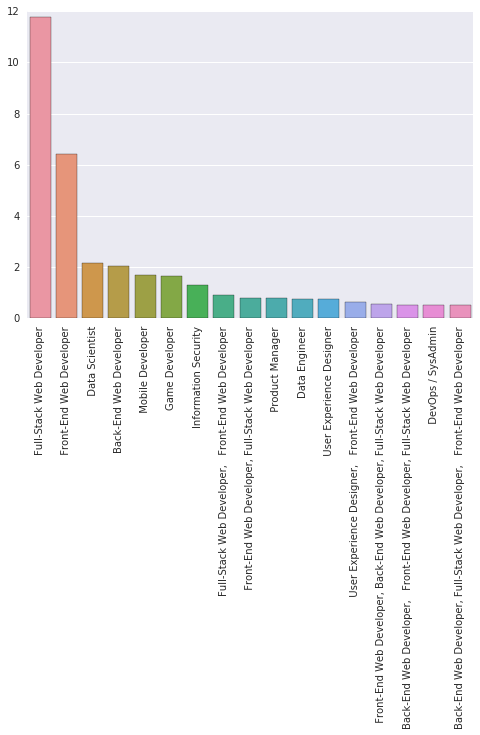

In [33]:
x = file['JobRoleInterest'].value_counts(normalize=True)*100
x = x[x>=0.5]
sns.barplot(y=x.values, x=x.index)
plt.xticks(rotation=90)

plt.show()

From the frequency table, it is apparent that some coders are interested in multiple tracks. But Web dev and Mobile development that is the focus of my company is within the top five tracks the participants are interested in. 

### Coders Location and Density

In [3]:
## dropping entries without interest
file_updated = file[~file['JobRoleInterest'].isna()]
file_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 7.3+ MB


In [4]:
country_freq = file_updated['CountryLive'].value_counts(normalize=True)*100
country_freq = country_freq[country_freq >= 1]
country_freq

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Nigeria                      1.228429
Spain                        1.126060
France                       1.096812
Romania                      1.038315
Name: CountryLive, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



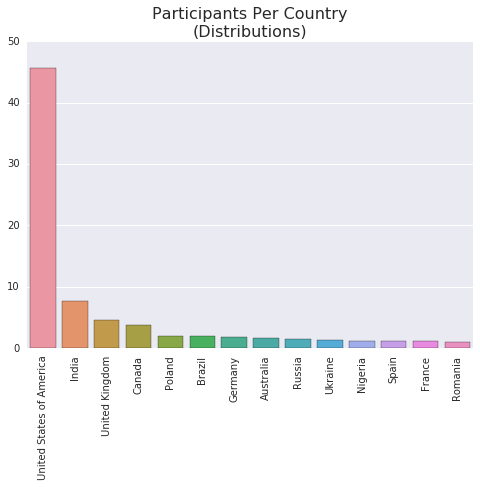

In [50]:
sns.barplot(y=country_freq.values, x=country_freq.index)
plt.xticks(rotation=90)
plt.title('Participants Per Country\n(Distributions)',
          fontsize = 16)
plt.show()

Based on the graph, USA and India are the two major countries we should focus our advertisement in. This however would be shortsighted as we need to know how much the citizens are willing to pay.

### Money for Learning

To improve the scope of the analysis, I will be investigating the top four countries which also happen to have their official language as English for how much the students are willing to pay per month. Our monthly subcription is $59. 

In [5]:
#monthly payment
file_updated['MonthsProgramming'].replace(0, 1, inplace=True)
file_updated['monthly'] = file_updated['MoneyForLearning'] / file_updated['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [63]:
# determining the number of null entries
file_updated['monthly'].isna().sum()

675

In [6]:
#removing entries without monthly expenditure

file_updated_new = file_updated[~file_updated['monthly'].isna()]
file_updated_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6317 entries, 1 to 18171
Columns: 137 entries, Age to monthly
dtypes: float64(106), object(31)
memory usage: 6.7+ MB


In [7]:
#removing entries with no countries

file_updated_new1 = file_updated_new[~file_updated_new['CountryLive'].isna()]
file_updated_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Columns: 137 entries, Age to monthly
dtypes: float64(106), object(31)
memory usage: 6.5+ MB


In [8]:
i = file_updated_new1.groupby('CountryLive').mean()['monthly'].sort_values(ascending=False)
i[['United States of America', 'Canada', 'India', 'United Kingdom']]

CountryLive
United States of America    227.997996
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
Name: monthly, dtype: float64

The top two countries based on the mean amount paid per learners per month are USA and India which is surprising because one would have expected that UK and Canada should have higher figures than India when considering GDP and other economic metrics. 

## Dealing with Outliers

The anomaly that was observed above for Canada and UK can maybe due to the presence of outliers in the India data. Or perhaps it is just waht it is :) 

In [17]:
countries = file_updated_new1[(file_updated_new1['CountryLive'] == 'United States of America') | (file_updated_new1['CountryLive'] == 'Canada') | (file_updated_new1['CountryLive'] == 'United Kingdom') | (file_updated_new1['CountryLive'] == 'India')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



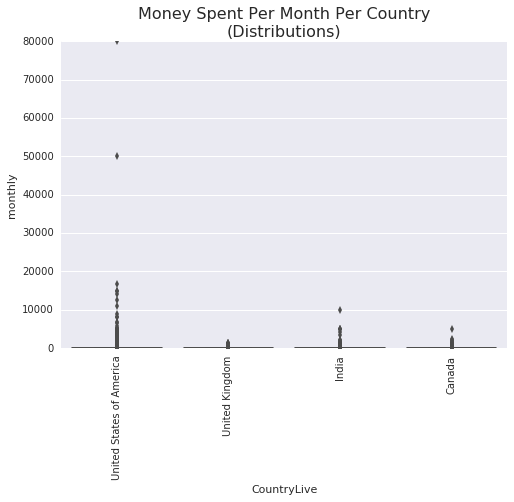

In [49]:
sns.boxplot(y='monthly', x='CountryLive', data=countries)
plt.xticks(rotation=90)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.show()

Apparently, there are some extreme outliers in the entries that is even obstructing the visualization of the plots. To remove outliers in the chart, I will limit the value to $10,000.

In [34]:
countries_new = countries[countries['monthly']<=10000]
countries_new.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667


In [35]:
# recalculate the mean
countries_new.groupby('CountryLive').mean()['monthly'].sort_values(ascending=False)

CountryLive
United States of America    155.459187
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: monthly, dtype: float64

The India mean is still extreme, therefore, I will visualize again for the presence of outliers 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



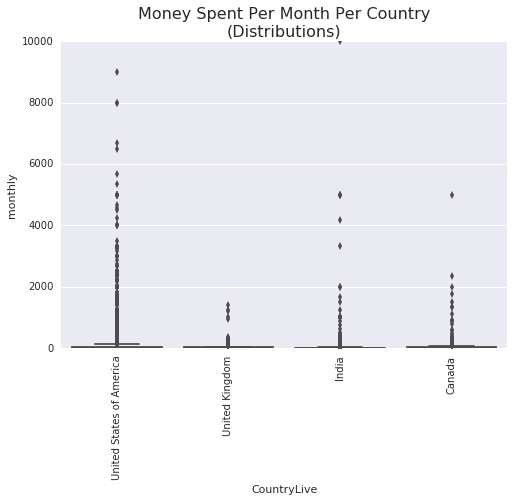

In [48]:
sns.boxplot(y='monthly', x='CountryLive', data=countries_new)
plt.xticks(rotation=90)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.show()

In [40]:
#removing outliers; USA: above $6k, India: above 2k, Canada: above $4k
USA = countries_new[countries_new['CountryLive'] == 'United States of America']
India = countries_new[countries_new['CountryLive'] == 'India']
Canada = countries_new[countries_new['CountryLive'] == 'Canada']
UK = countries_new[countries_new['CountryLive'] == 'United Kingdom']

In [41]:
USA_new = USA[USA['monthly'] <= 6000]
India_new = India[India['monthly'] <= 2000]
Canada_new = Canada[Canada['monthly'] <= 4000]

In [44]:
#stacking
pieces = (USA_new, India_new, Canada_new, UK)
df = pd.concat(pieces, ignore_index = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Columns: 137 entries, Age to monthly
dtypes: float64(106), object(31)
memory usage: 4.1+ MB


In [47]:
# recalculate the mean
df.groupby('CountryLive').mean()['monthly'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: monthly, dtype: float64

After the extreme outliers are treated, Canada improved. And even though the case of the UK is still somewhat anomalous, I will proceed since I need two countries for my recommendation.

### Choosing the two Major Markets
Apparently, the USA is the best market for our advertising campaign. But which is the second to choose? Our monthly subscription is $59 and we need to consider the population of potential customers in the country too. 


In [56]:
df['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

If we were to select another country to advertise, it would be India since it has the highest number of potential customers after the United States. But given that we have limited funds for advertisement, would it be worth sharing it between the USA and India? I think this a decision best left for the marketing team given their domain knowledge. Will take me leaveeee...

Cheers!

Lawal O.
